### EDA For Companies in Russia Data Set

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [48]:
country_data = pd.read_csv('../data/companies.csv')
country_data.head()

,Name,Action,Industry,Country,Grade
0,Agrana,continue operating plant in Russia,Consumer Staples,Austria,F
1,Agricultural Bank of China,Russian companies open accounts with the bank;...,Financials,China,F
2,Air China,still flying to Russia,Industrials,China,F
3,Air Serbia,still flying to Russia,Industrials,Serbia,F
4,Alibaba,still operating in Russia,Consumer Discretionary,China,F


In [49]:
country_data.describe()

,Name,Action,Industry,Country,Grade
count,1581,1581,1581,1581,1581
unique,1581,1128,12,67,5
top,Agrana,still operating in Russia,Industrials,United States,A
freq,1,53,403,457,521


In [53]:
industry_counts = country_data['Industry'].value_counts()
total_companies = len(country_data)

industry_percentages = industry_counts / total_companies * 100
print(round(industry_percentages, 2))

Industrials               25.49
Consumer Discretionary    19.80
Information Technology    12.33
Consumer Staples          10.56
Financials                 8.22
Materials                  6.14
Communication Services     4.62
Health Care                4.43
Energy                     3.92
NGO                        2.53
Utilities                  1.08
Real Estate                0.89
Name: Industry, dtype: float64


Text(0, 0.5, 'Percentage of Total')

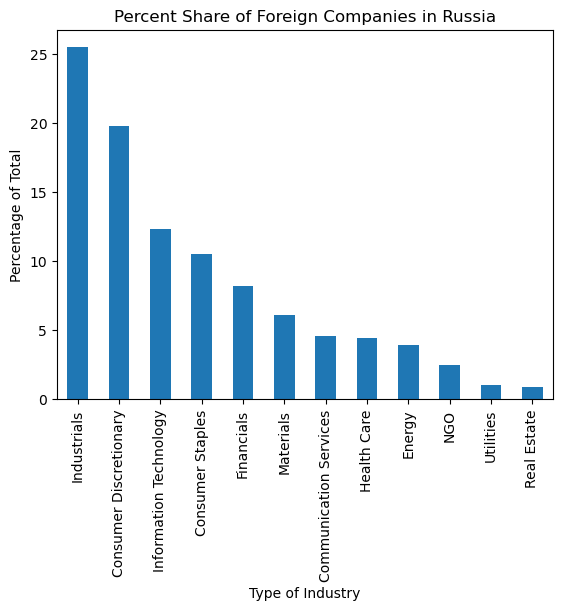

In [ ]:
industry_percentages.plot(kind='bar')

plt.title('Percent Share of Foreign Companies in Russia')
plt.xlabel('Type of Industry')
plt.ylabel('Percentage of Total')

The above chart demonstrates a question about the research.  How best to demonstrate which company industries are significant outliers for behavior given their share of the total industry.  i.e. Industrials are the primary foreign company in Russia and so it looks in each letter grade that they are the highest represented category.

Now I want to narrow my focus to the top six industries.

In [ ]:
top_industries = industry_counts.head(6).index.tolist()

focused_data = country_data[country_data['Industry'].isin(top_industries)]

#Verify that this only shows data from the six biggest categories: Industrials, Consumer Disc., IT, Consumer Staples, Financials, Materials
print(focused_data.head(30))

In [55]:
#Recalculate Data to show percentages of total with only these six categories
top_six_industries = focused_data['Industry'].value_counts()
top_six_percentages = top_six_industries / len(focused_data) * 100

print(round(top_six_percentages, 2))

Industrials               30.88
Consumer Discretionary    23.98
Information Technology    14.94
Consumer Staples          12.80
Financials                 9.96
Materials                  7.43
Name: Industry, dtype: float64


Text(0, 0.5, 'Percentage of Total')

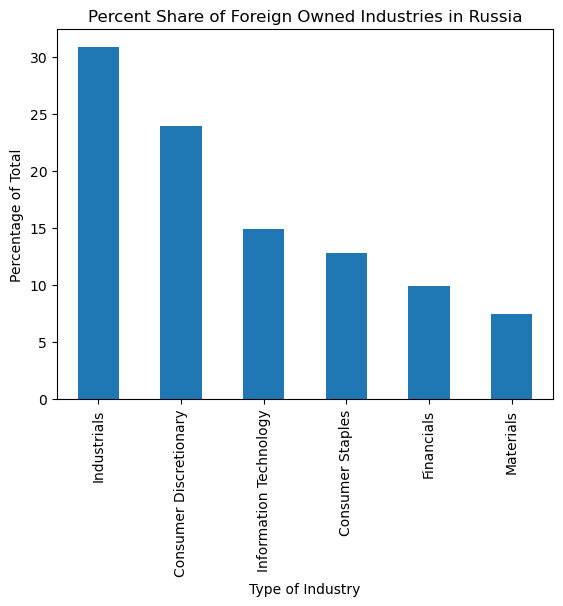

In [58]:
top_six_percentages.plot(kind='bar')

plt. title('Percent Share of Foreign Owned Industries in Russia')
plt.xlabel('Type of Industry')
plt.ylabel('Percentage of Total')

In [ ]:
"This code groups by industry and shows how many of each grade that industry received."

industry_grades = country_data.groupby('Industry')['Grade'].value_counts()
print(industry_grades)

In [ ]:
industry_percentages.plot(kind='bar')

plt.title('Percent Share of Foreign Companies in Russia')
plt.xlabel('Type of Industry')
plt.ylabel('Percentage of Total')

The below is somewhat redundant at this juncture, I need to show this data as a percentage of the total and not of a number.

In [ ]:
industry_grades = country_data.groupby(['Industry', 'Grade'])['Grade'].value_counts().sort_values(ascending=False)
print(industry_grades)


In [ ]:
#Grade A By the numbers

grade_A = country_data[country_data['Grade'] == 'A'].groupby('Industry')['Grade'].count()
grade_A

Industry
Communication Services     26
Consumer Discretionary     88
Consumer Staples           54
Energy                     21
Financials                 45
Health Care                 3
Industrials               151
Information Technology     64
Materials                  35
NGO                        21
Real Estate                 6
Utilities                   7
Name: Grade, dtype: int64

In [ ]:
grade_B = country_data[country_data['Grade'] == 'B'].groupby('Industry')['Grade'].count()
grade_B

Industry
Communication Services     28
Consumer Discretionary    130
Consumer Staples           41
Energy                      8
Financials                 35
Health Care                10
Industrials               118
Information Technology     93
Materials                  19
NGO                        16
Real Estate                 3
Utilities                   2
Name: Grade, dtype: int64

In [ ]:
grade_C = country_data[country_data['Grade'] == 'C'].groupby('Industry')['Grade'].count()
grade_C

Industry
Communication Services     7
Consumer Discretionary    23
Consumer Staples          11
Energy                     7
Financials                24
Health Care                7
Industrials               38
Information Technology    15
Materials                 13
Real Estate                1
Utilities                  3
Name: Grade, dtype: int64

In [ ]:
grade_D = country_data[country_data['Grade'] == 'D'].groupby('Industry')['Grade'].count()
grade_D

Industry
Communication Services     4
Consumer Discretionary    21
Consumer Staples          38
Energy                    10
Financials                11
Health Care               32
Industrials               32
Information Technology    11
Materials                 12
NGO                        3
Utilities                  2
Name: Grade, dtype: int64

In [ ]:
grade_F = country_data[country_data['Grade'] == 'F'].groupby('Industry')['Grade'].count()
grade_F

Industry
Communication Services     8
Consumer Discretionary    51
Consumer Staples          23
Energy                    16
Financials                15
Health Care               18
Industrials               64
Information Technology    12
Materials                 18
Real Estate                4
Utilities                  3
Name: Grade, dtype: int64